# Evaluation

## Results

#### Auto-Mode
Nutzt eine Heuristic, eine SInE Strategy und eine Selection Function
#### Satauto-Mode
Nutzt eine Heuristic und eine Selection Function

### Importe

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Ergebnisse

In [2]:
def summary_grafic(path: str, title: str, output_path: str):
    with open(path, 'r') as file:
        data = json.load(file)
        
    # Result categories
    categories = ["ProverResult.TIME_OUT", "ProverResult.PROOF_FOUND", "ProverResult.GAVE_UP"]

    # Extract data for plotting
    files = list(data.keys())
    n_files = len(files)
    n_categories = len(categories)

    # Initialize an array for category counts
    category_counts = np.zeros((n_files, n_categories), dtype=int)

    # Fill the category counts
    for i, (file, results) in enumerate(data.items()):
        for j, category in enumerate(categories):
            category_counts[i, j] = results.get(category, 0)

    # Choose a color palette
    colors = sns.color_palette('deep', n_categories)

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 6))
    bar_width = 0.25
    index = np.arange(n_files)

    # Plot a bar for each category with the chosen colors
    bars = []
    for j, (category, color) in enumerate(zip(categories, colors)):
        bars.append(ax.bar(index + j * bar_width, category_counts[:, j], bar_width, label=category, color=color))

    # Add labels, legend, and title
    ax.set_xlabel('Files', fontsize=12)
    ax.set_ylabel('Counts', fontsize=12)
    ax.set_title(f'Summary of Prover Results: {title}', fontsize=14, fontweight='bold')
    ax.set_xticks(index + bar_width * (n_categories - 1) / 2)
    ax.set_xticklabels(files, rotation=45, ha='right', fontsize=10)

    # Set y-axis limit
    ax.set_ylim(0, 1000)

    # Adjust the legend
    ax.legend(fontsize=10, title='Category', title_fontsize='13', loc='upper left', bbox_to_anchor=(1, 1))

    # Introduce horizontal grid lines
    ax.yaxis.grid(True, linestyle='--', which='major', color='gray', alpha=0.7)
    ax.set_axisbelow(True)

    # Add count labels above the bars
    for bar_group in bars:
        for bar in bar_group:
            yval = bar.get_height()
            if yval > 950:
                label_position = yval - 20
                label_va = 'top'
            else:
                label_position = yval + 10
                label_va = 'bottom'
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                label_position,
                int(yval),
                ha='center', va=label_va, fontsize=9, color='black', weight='bold'
            )

    # Save plot as a PDF with tight layout
    path_prefix = "/Users/eltorrogrande/BachelorInformatik/BachelorThesis/further-work-of-seven/text/"
    output_path = path_prefix + output_path
    plt.savefig(output_path, format='pdf', bbox_inches='tight')
    plt.show()
    plt.close(fig)

# Usage example
# summary_grafic('summary_auto.json', "Auto-Mode", 'auto_mode_output.pdf')

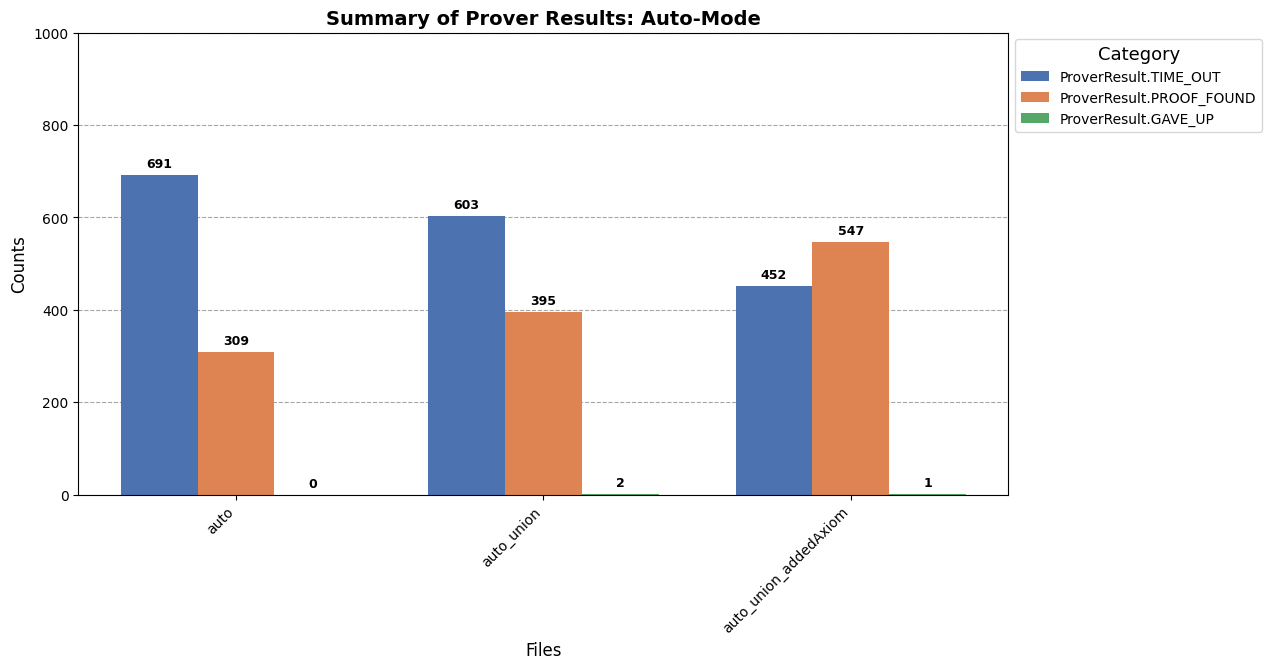

In [3]:
summary_grafic('summary_auto.json', "Auto-Mode", "auto_mode_output.pdf")

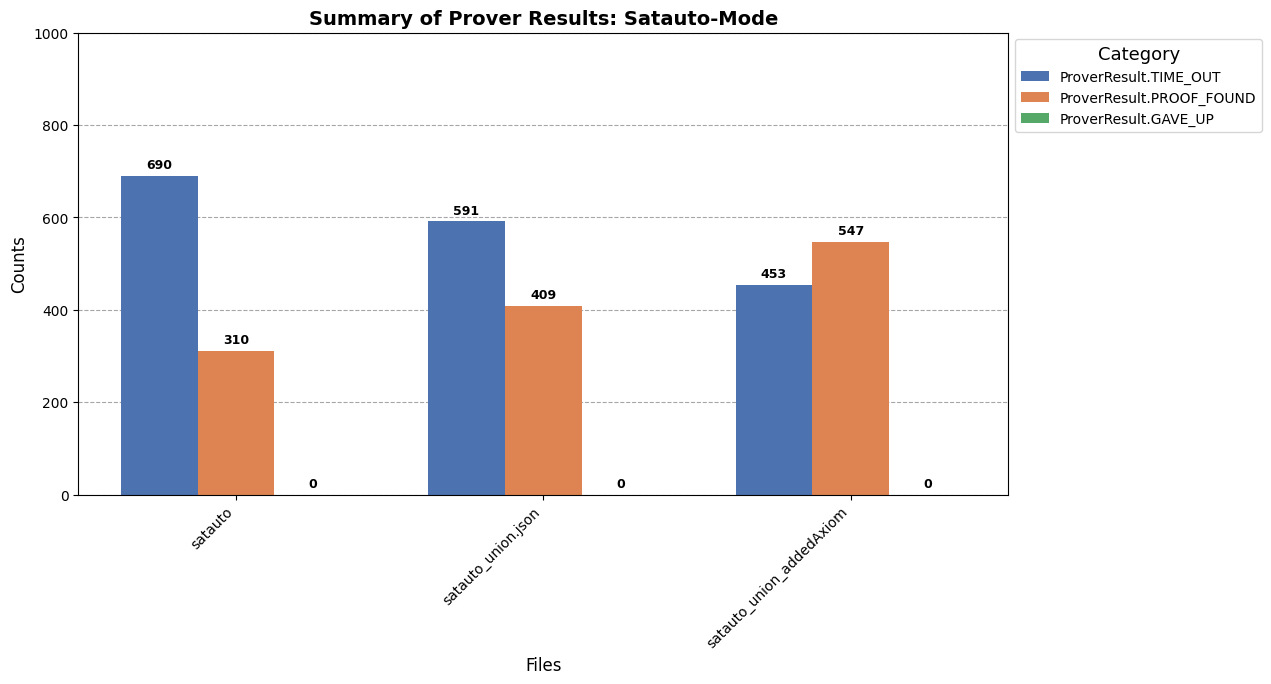

In [4]:
summary_grafic('./summary_satauto.json', "Satauto-Mode", "satauto_mode_output.pdf")

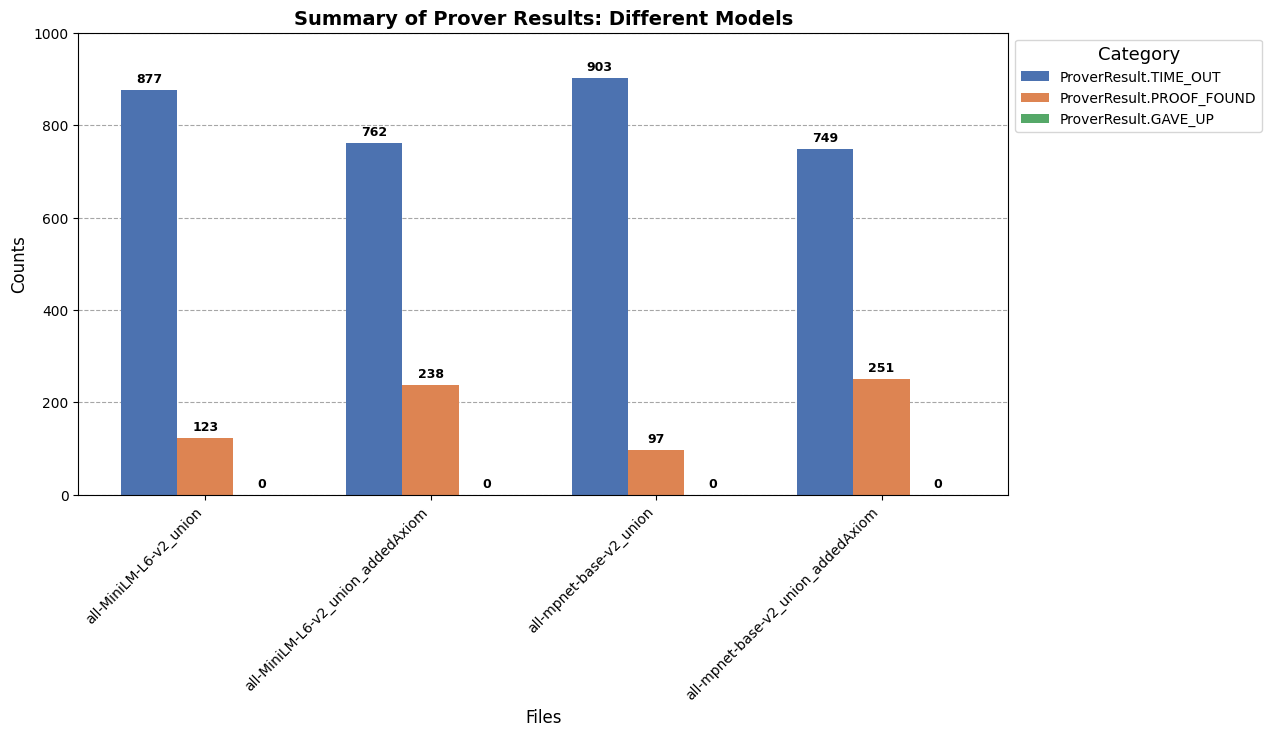

In [5]:
summary_grafic('./summary_otherModule.json', "Different Models", "different_mode_output.pdf")

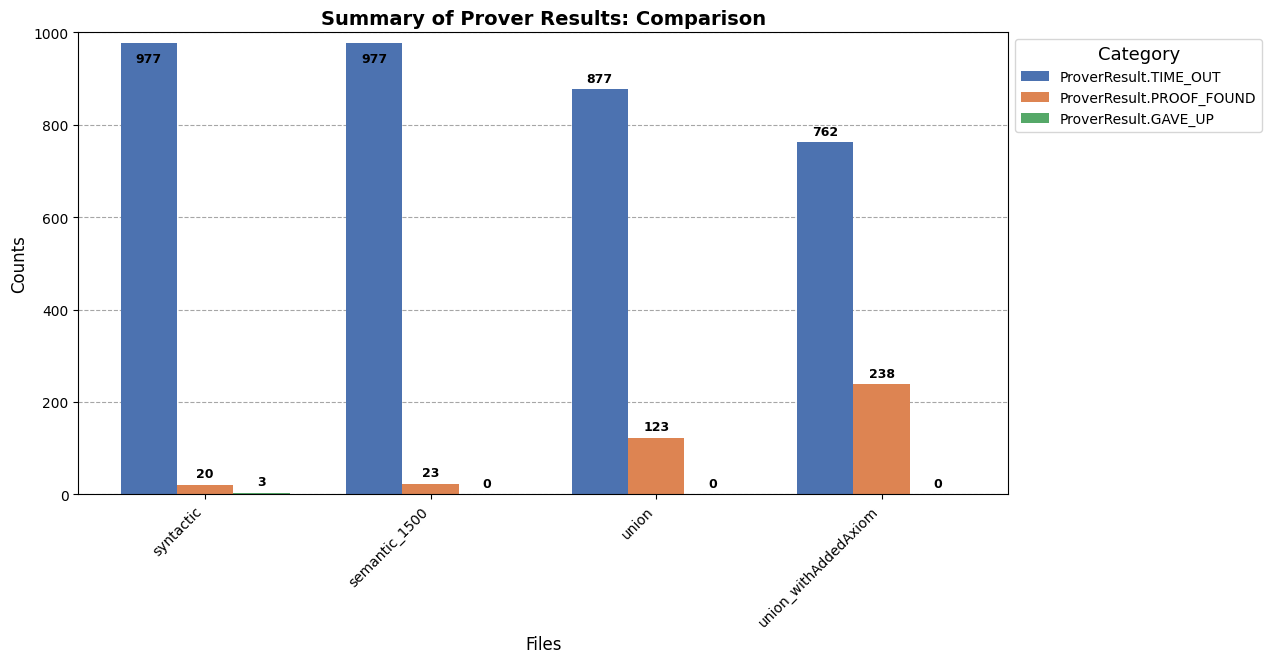

In [10]:
summary_grafic('./summary_starter.json', "Comparison", "standard_mode_output.pdf")

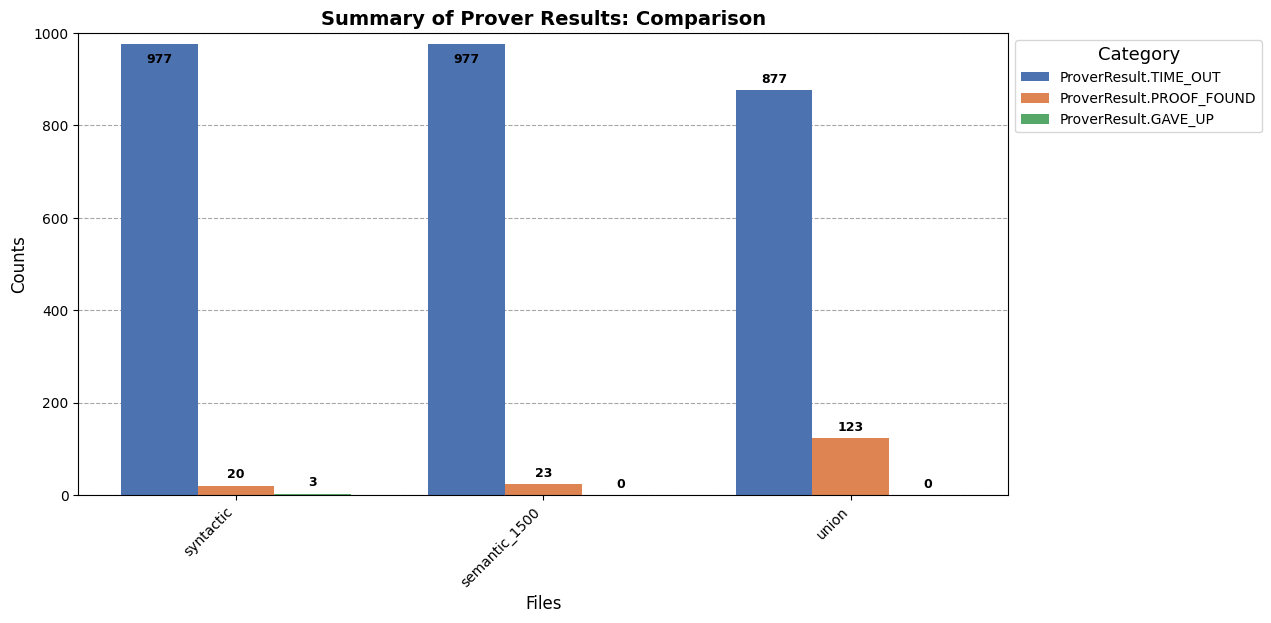

In [9]:
summary_grafic('./summary_starter_noadded.json', "Comparison", "standard_mode_noAdded_output.pdf")

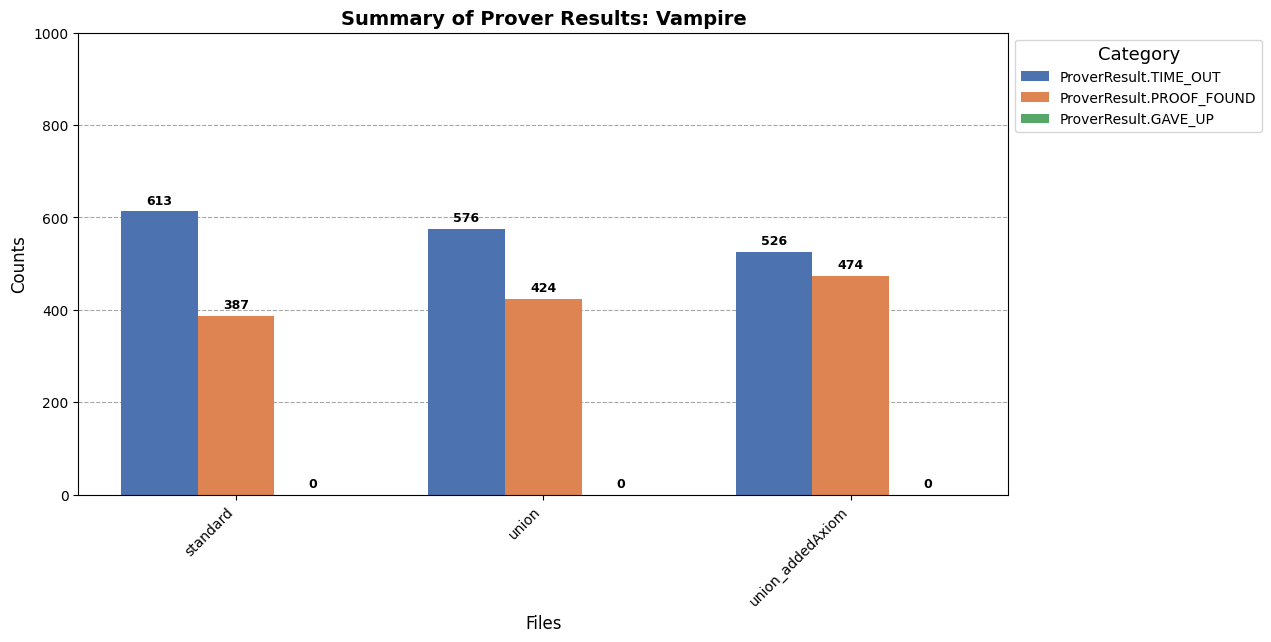

In [7]:
summary_grafic('./summary_vampire.json', "Vampire", "vampire_mode_output.pdf")